In [43]:
import matplotlib.pyplot as plt
import numpy as np

In [44]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, random_state=10)

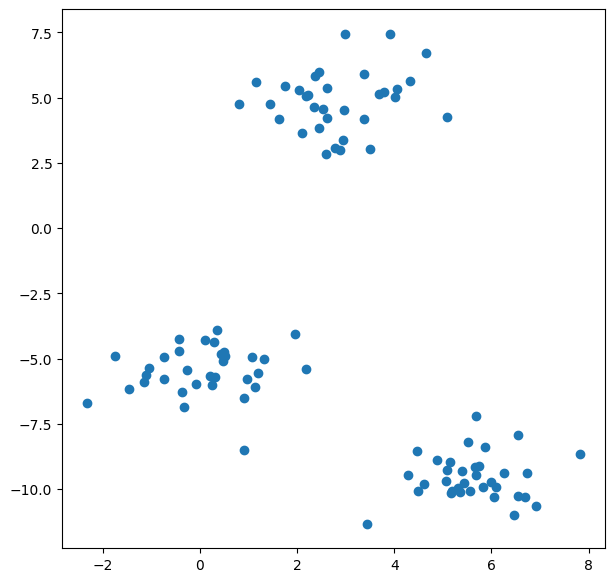

In [45]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1]);

In [46]:
k = 3

In [47]:
np.random.seed(0)
centroid_ids = np.random.choice(X.shape[0], k, replace=False)
centroid_ids

array([26, 86,  2])

In [48]:
centroids = X[centroid_ids]

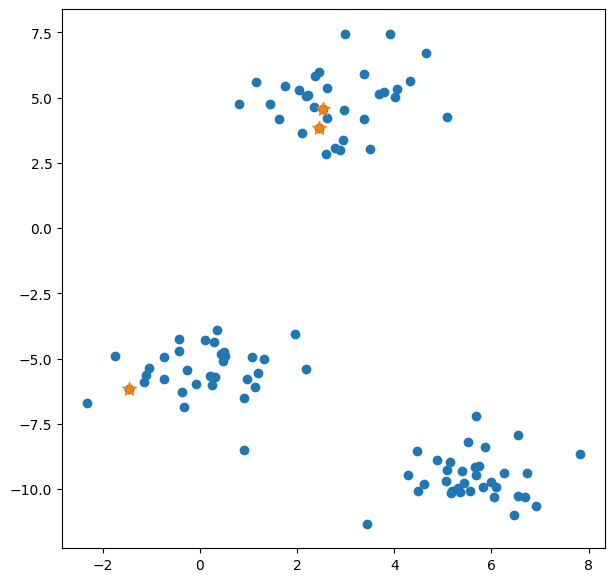

In [49]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=100)

In [50]:
colors = ['green', 'orange', 'red']

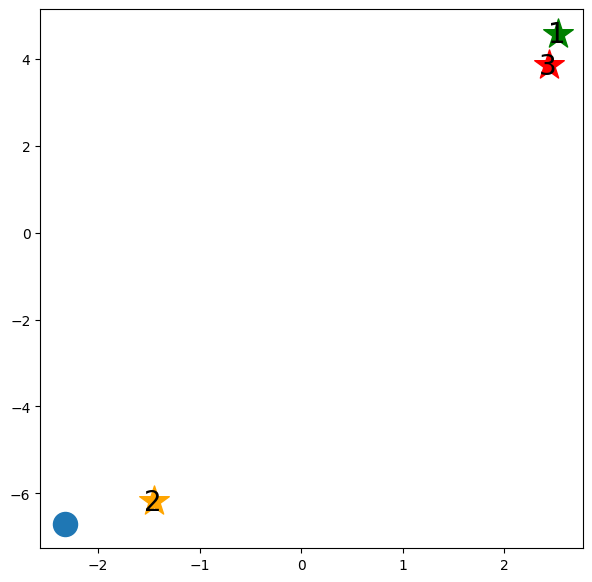

In [51]:
idx_1 = 0
plt.figure(figsize=(7, 7))
plt.scatter(X[idx_1, 0], X[idx_1, 1], s=300)

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20)

In [52]:
np.linalg.norm(centroids - X[idx_1], axis=1)

array([12.27614681,  1.01564584, 11.5742295 ])

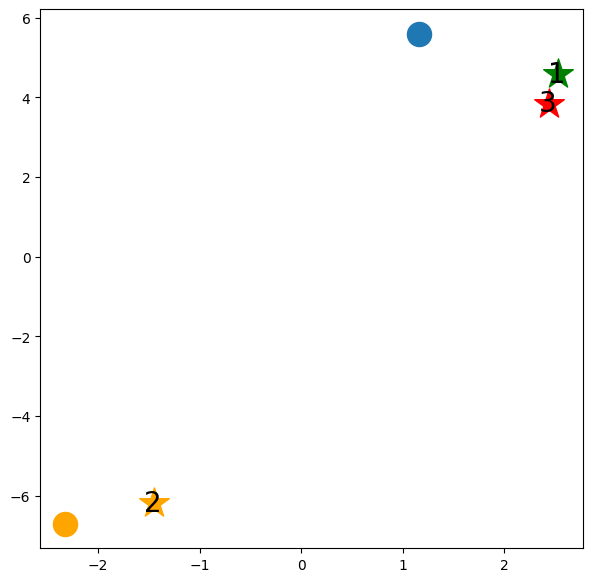

In [53]:
idx_2 = 11

plt.figure(figsize=(7, 7))
plt.scatter(X[idx_1, 0], X[idx_1, 1], s=300, c=colors[1])
plt.scatter(X[idx_2, 0], X[idx_2, 1], s=300)

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20)

In [54]:
np.linalg.norm(centroids - X[idx_2], axis=1)

array([ 1.70360812, 12.06653963,  2.16731949])

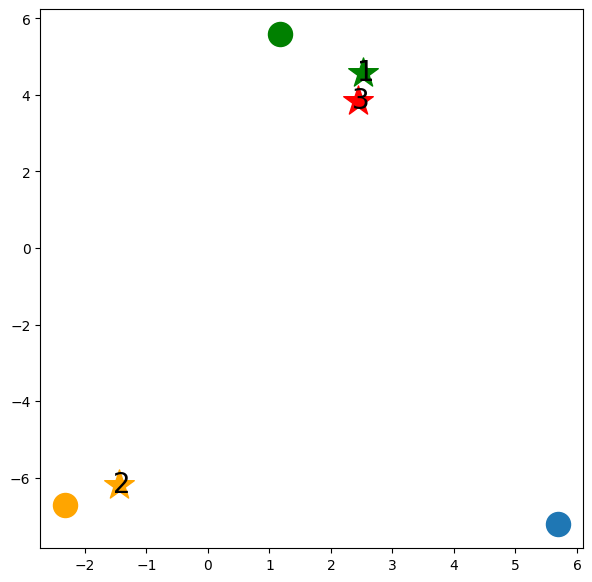

In [55]:
idx_3 = 9

plt.figure(figsize=(7, 7))
plt.scatter(X[idx_1, 0], X[idx_1, 1], s=300, c=colors[1])
plt.scatter(X[idx_2, 0], X[idx_2, 1], s=300, c=colors[0])
plt.scatter(X[idx_3, 0], X[idx_3, 1], s=300)

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);

In [56]:
np.linalg.norm(centroids - X[idx_3], axis=1)

array([12.1935543 ,  7.21525378, 11.51453993])

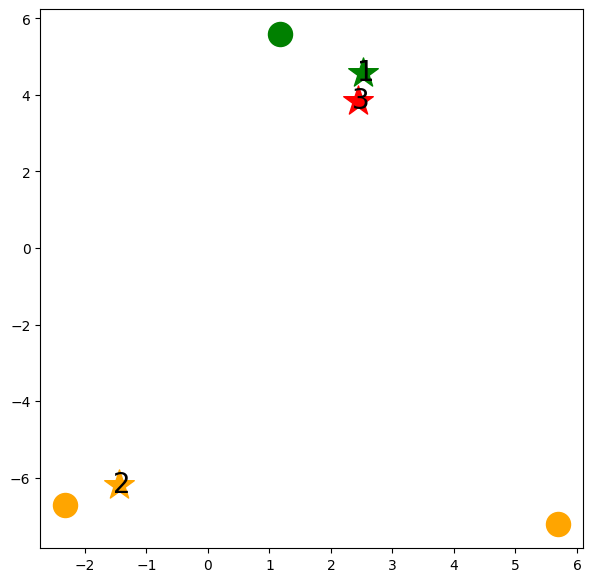

In [57]:
plt.figure(figsize=(7, 7))
plt.scatter(X[idx_1, 0], X[idx_1, 1], s=300, c=colors[1])
plt.scatter(X[idx_2, 0], X[idx_2, 1], s=300, c=colors[0])
plt.scatter(X[idx_3, 0], X[idx_3, 1], s=300, c=colors[1])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20)

In [58]:
clusters = {i: [] for i in range(k)}
clusters

{0: [], 1: [], 2: []}

In [59]:
for x in X:
    distances = np.linalg.norm(centroids - x, axis=1)
    cluster_ind = distances.argmin()
    clusters[cluster_ind].append(x)

clusters

{0: [array([2.03300209, 5.28990817]),
  array([3.37979515, 4.18880872]),
  array([3.78067293, 5.22062163]),
  array([1.16464321, 5.59667831]),
  array([4.32968132, 5.64396726]),
  array([2.61105267, 4.22218469]),
  array([0.81677922, 4.75330395]),
  array([2.52859794, 4.5759393 ]),
  array([3.69548081, 5.14288792]),
  array([2.37698085, 5.82428626]),
  array([1.44712872, 4.75428451]),
  array([2.96590542, 4.5052704 ]),
  array([2.45717481, 5.96515011]),
  array([4.05619693, 5.32231077]),
  array([3.90917002, 7.44140273]),
  array([2.62413419, 5.36941887]),
  array([2.98771848, 7.44372871]),
  array([5.0772903 , 4.23672091]),
  array([4.65804929, 6.7208918 ]),
  array([2.36013594, 4.62719573]),
  array([2.23393846, 5.11718182]),
  array([4.01289101, 5.00538736]),
  array([1.75005543, 5.44582908]),
  array([3.38492372, 5.8943468 ]),
  array([2.19087156, 5.06566526])],
 1: [array([-2.32496308, -6.6999964 ]),
  array([ 0.51856831, -4.90086804]),
  array([ 5.82662285, -9.92259335]),
  array

In [60]:
len(clusters[0]), len(clusters[1]), len(clusters[2])

(25, 67, 8)

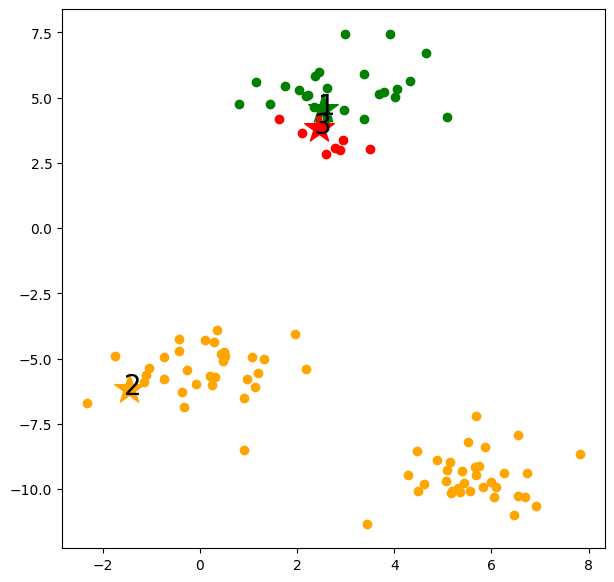

In [61]:
plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);

In [62]:
centroids

array([[ 2.52859794,  4.5759393 ],
       [-1.45074027, -6.18301386],
       [ 2.44301805,  3.84652646]])

In [63]:
new_centroids = {}
for cluster in clusters:
    new_centroids[cluster] = np.mean(clusters[cluster], axis=0)

new_centroids

{0: array([2.91329082, 5.33493484]),
 1: array([ 2.89504171, -7.53408753]),
 2: array([2.61305824, 3.369246  ])}

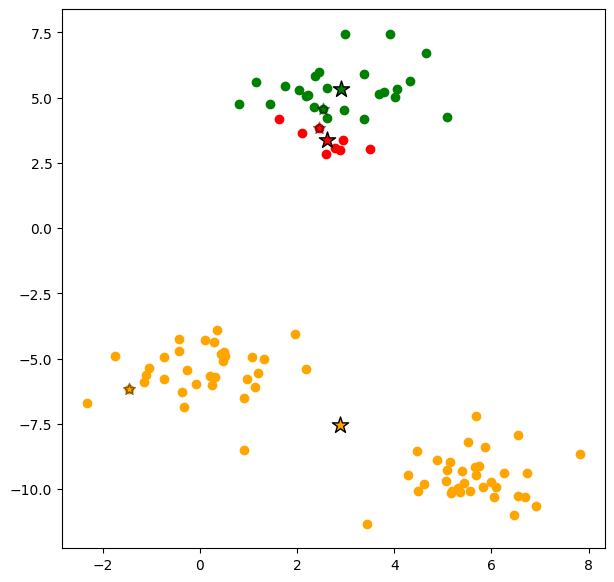

In [64]:
plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], s=80, c=colors[i], marker='*', alpha=0.5, edgecolors='black')

for i in new_centroids:
    plt.scatter(new_centroids[i][0], new_centroids[i][1], marker='*', s=150, c=colors[i], edgecolors='black')

In [65]:
new_centroids = dict(sorted(new_centroids.items()))
new_centroids = np.array(list(new_centroids.values()))
centroids = new_centroids.copy()
centroids

array([[ 2.91329082,  5.33493484],
       [ 2.89504171, -7.53408753],
       [ 2.61305824,  3.369246  ]])

In [66]:
clusters = {i: [] for i in range(k)}
clusters

{0: [], 1: [], 2: []}

In [67]:
for x in X:
    distances = np.linalg.norm(centroids - x, axis=1)
    cluster_ind = distances.argmin()
    clusters[cluster_ind].append(x)

clusters

{0: [array([2.03300209, 5.28990817]),
  array([3.78067293, 5.22062163]),
  array([1.16464321, 5.59667831]),
  array([4.32968132, 5.64396726]),
  array([0.81677922, 4.75330395]),
  array([2.52859794, 4.5759393 ]),
  array([3.69548081, 5.14288792]),
  array([2.37698085, 5.82428626]),
  array([1.44712872, 4.75428451]),
  array([2.96590542, 4.5052704 ]),
  array([2.45717481, 5.96515011]),
  array([4.05619693, 5.32231077]),
  array([3.90917002, 7.44140273]),
  array([2.62413419, 5.36941887]),
  array([2.98771848, 7.44372871]),
  array([5.0772903 , 4.23672091]),
  array([4.65804929, 6.7208918 ]),
  array([2.36013594, 4.62719573]),
  array([2.23393846, 5.11718182]),
  array([4.01289101, 5.00538736]),
  array([1.75005543, 5.44582908]),
  array([3.38492372, 5.8943468 ]),
  array([2.19087156, 5.06566526])],
 1: [array([-2.32496308, -6.6999964 ]),
  array([ 0.51856831, -4.90086804]),
  array([ 5.82662285, -9.92259335]),
  array([  6.04774884, -10.30504657]),
  array([-0.42084194, -4.24889336]),
 

In [68]:
len(clusters[0]), len(clusters[1]), len(clusters[2])

(23, 67, 10)

In [69]:
new_centroids = {}
for cluster in clusters:
    new_centroids[cluster] = np.mean(clusters[cluster], axis=0)

new_centroids

{0: array([2.90614881, 5.43314686]),
 1: array([ 2.89504171, -7.53408753]),
 2: array([2.68953138, 3.53649614])}

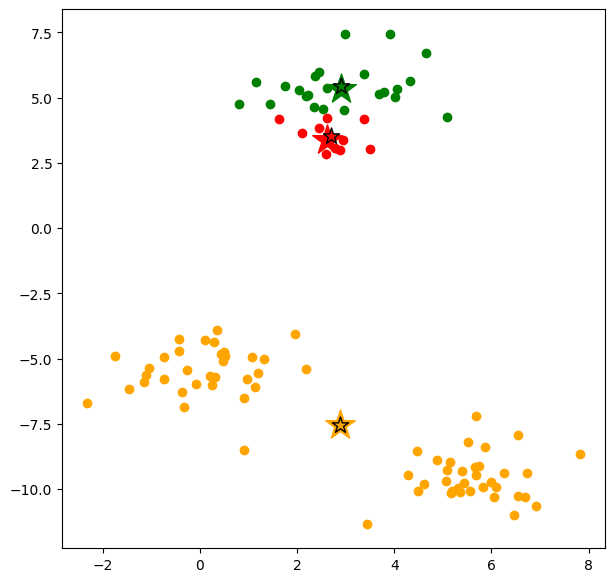

In [70]:
plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])

for i in new_centroids:
    plt.scatter(new_centroids[i][0], new_centroids[i][1], marker='*', s=150, c=colors[i], edgecolors='black')

In [71]:
from tqdm import tqdm

def KMeans(X, k=3, num_iter=10):
    np.random.seed(0)
    centroid_ids = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[centroid_ids]

    for i in tqdm(range(num_iter)):
        clusters = {i: [] for i in range(k)}

        for x in X:
            distances = np.linalg.norm(centroids - x, axis=1)
            cluster_ind = distances.argmin()
            clusters[cluster_ind].append(x)

        new_centroids = {}
        for cluster in clusters:
            new_centroids[cluster] = np.mean(clusters[cluster], axis=0)

        new_centroids = dict(sorted(new_centroids.items()))
        new_centroids = np.array(list(new_centroids.values()))
        centroids = new_centroids.copy()

    return centroids, clusters

In [72]:
centroids, clusters = KMeans(X)
centroids

100%|██████████| 10/10 [00:00<00:00, 1248.56it/s]


array([[ 2.90614881,  5.43314686],
       [ 2.89504171, -7.53408753],
       [ 2.68953138,  3.53649614]])

In [73]:
clusters

{0: [array([2.03300209, 5.28990817]),
  array([3.78067293, 5.22062163]),
  array([1.16464321, 5.59667831]),
  array([4.32968132, 5.64396726]),
  array([0.81677922, 4.75330395]),
  array([2.52859794, 4.5759393 ]),
  array([3.69548081, 5.14288792]),
  array([2.37698085, 5.82428626]),
  array([1.44712872, 4.75428451]),
  array([2.96590542, 4.5052704 ]),
  array([2.45717481, 5.96515011]),
  array([4.05619693, 5.32231077]),
  array([3.90917002, 7.44140273]),
  array([2.62413419, 5.36941887]),
  array([2.98771848, 7.44372871]),
  array([5.0772903 , 4.23672091]),
  array([4.65804929, 6.7208918 ]),
  array([2.36013594, 4.62719573]),
  array([2.23393846, 5.11718182]),
  array([4.01289101, 5.00538736]),
  array([1.75005543, 5.44582908]),
  array([3.38492372, 5.8943468 ]),
  array([2.19087156, 5.06566526])],
 1: [array([-2.32496308, -6.6999964 ]),
  array([ 0.51856831, -4.90086804]),
  array([ 5.82662285, -9.92259335]),
  array([  6.04774884, -10.30504657]),
  array([-0.42084194, -4.24889336]),
 

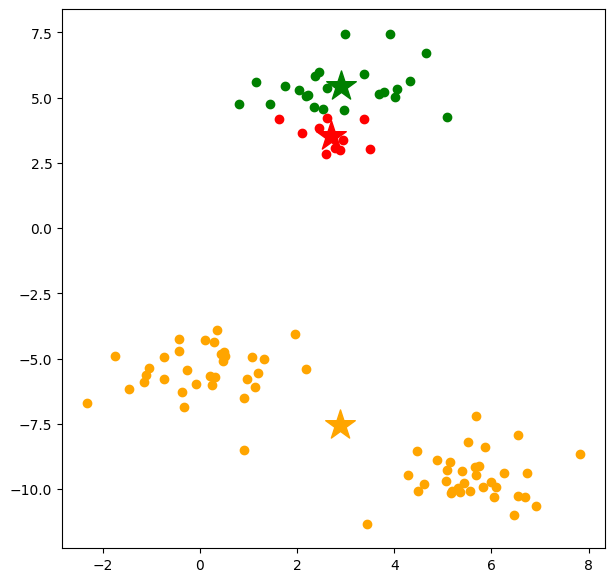

In [74]:
plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])

In [75]:
def KMeans(X, k=3, num_iter=10, min_distance=1e-4, seed=0):
    np.random.seed(seed)
    centroid_ids = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[centroid_ids]

    for i in range(num_iter):
        clusters = {i: [] for i in range(k)}

        for x in X:
            distances = np.linalg.norm(centroids - x, axis=1)
            cluster_ind = distances.argmin()
            clusters[cluster_ind].append(x)

        new_centroids = {}
        for cluster in clusters:
            new_centroids[cluster] = np.mean(clusters[cluster], axis=0)

        new_centroids = dict(sorted(new_centroids.items()))
        new_centroids = np.array(list(new_centroids.values()))

        print(len(clusters[0]), len(clusters[1]), len(clusters[2]))
        print(new_centroids)

        is_stop = True
        for clust in range(len(centroids)):
            if np.linalg.norm(centroids[clust] - new_centroids[clust]) > min_distance:
                is_stop = False
                break
        if is_stop:
            print(f'stopping at iter {i}')
            break

        centroids = new_centroids.copy()

    return centroids, clusters

In [76]:
centroids, clusters = KMeans(X)
centroids

25 67 8
[[ 2.91329082  5.33493484]
 [ 2.89504171 -7.53408753]
 [ 2.61305824  3.369246  ]]
23 67 10
[[ 2.90614881  5.43314686]
 [ 2.89504171 -7.53408753]
 [ 2.68953138  3.53649614]]
23 67 10
[[ 2.90614881  5.43314686]
 [ 2.89504171 -7.53408753]
 [ 2.68953138  3.53649614]]
stopping at iter 2


array([[ 2.90614881,  5.43314686],
       [ 2.89504171, -7.53408753],
       [ 2.68953138,  3.53649614]])

In [77]:
centr1 = np.array([[ 2.91329082,  5.33493484],
                   [ 2.89504171, -7.53408753],
                   [ 2.61305824,  3.369246  ]])
centr2 = np.array([[ 2.90614881,  5.43314686],
                   [ 2.89504171, -7.53408753],
                   [ 2.68953138,  3.53649614]])
centr3 = np.array([[ 2.90614881,  5.43314686],
                   [ 2.89504171, -7.53408753],
                   [ 2.68953138,  3.53649614]])

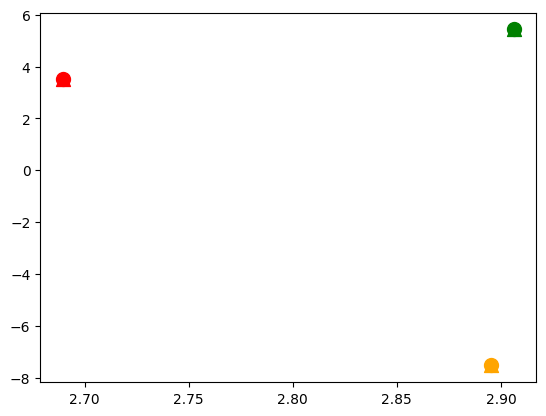

In [78]:

for i, centr in enumerate(centr1):
    # plt.scatter(centr1[i][0], centr1[i][1], marker='*', s=100, c=colors[i])
    plt.scatter(centr2[i][0], centr2[i][1], marker='^', s=100, c=colors[i])
    plt.scatter(centr3[i][0], centr3[i][1], marker='o', s=100, c=colors[i])

In [79]:
np.linalg.norm(centr2[0] - centr3[0])

0.0

In [80]:
centroids, clusters = KMeans(X, seed=1)
centroids

26 66 8
[[  5.29660654  -9.38045292]
 [  1.46485965  -0.3030066 ]
 [  6.66400306 -10.07078922]]
29 61 10
[[ 4.49298218 -8.90049529]
 [ 1.50550525  0.21865431]
 [ 6.55722276 -9.96800753]]
33 48 19
[[ 2.34915724 -7.50785928]
 [ 1.95733764  1.86223045]
 [ 6.11737555 -9.79390688]]
33 33 34
[[ 0.08921213 -5.46441742]
 [ 2.84050716  4.85840422]
 [ 5.6183469  -9.54288499]]
33 33 34
[[ 0.08921213 -5.46441742]
 [ 2.84050716  4.85840422]
 [ 5.6183469  -9.54288499]]
stopping at iter 4


array([[ 0.08921213, -5.46441742],
       [ 2.84050716,  4.85840422],
       [ 5.6183469 , -9.54288499]])

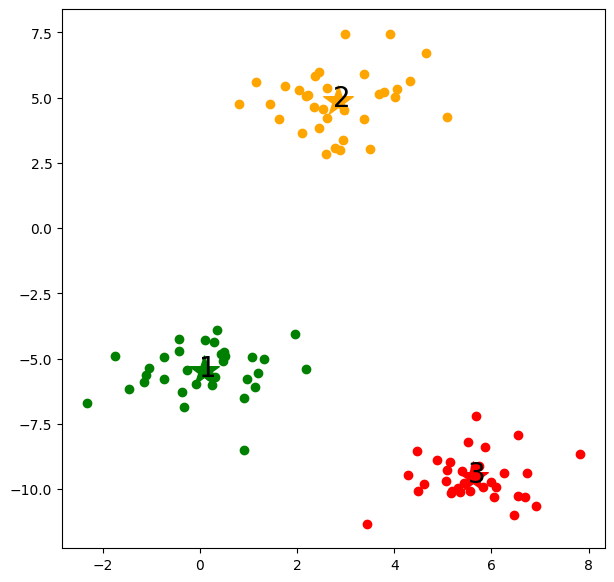

In [81]:
plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20)

In [82]:
from sklearn.cluster import KMeans as sk_KMeans

model = sk_KMeans(n_clusters=3,
                  init='k-means++',
                  max_iter=10,
                  random_state=0)

model.fit(X)

C:\Users\Prokhor\Desktop\Projects\Data_mining\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=10, n_clusters=3, random_state=0)

In [83]:
labels = model.predict(X)
labels[:10]

array([0, 0, 1, 2, 1, 1, 2, 0, 1, 2])

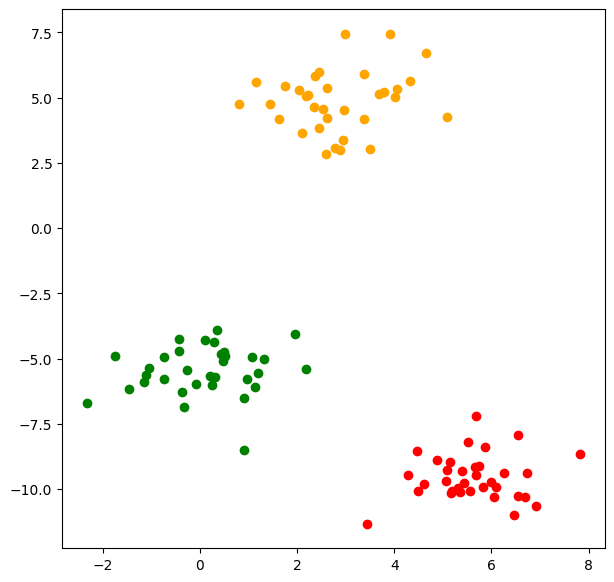

In [84]:
plt.figure(figsize=(7, 7))

for i in range(len(labels)):
    plt.scatter(X[i, 0], X[i, 1], color=colors[labels[i]])

In [85]:
model.cluster_centers_

array([[ 0.08921213, -5.46441742],
       [ 2.84050716,  4.85840422],
       [ 5.6183469 , -9.54288499]])

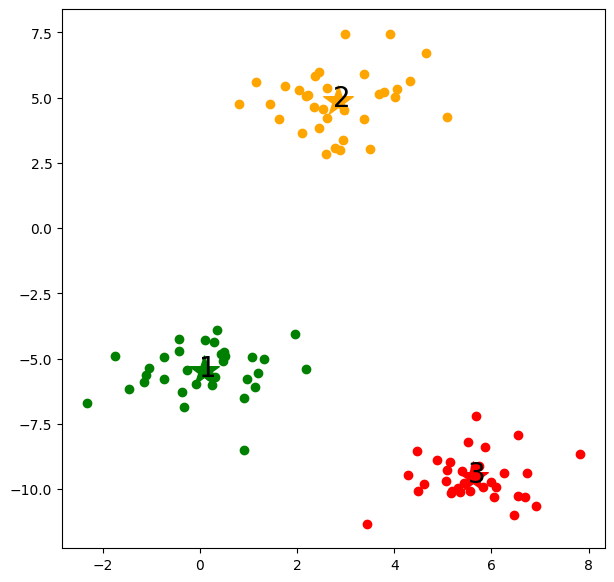

In [86]:
plt.figure(figsize=(7, 7))

for i in range(len(labels)):
    plt.scatter(X[i, 0], X[i, 1], color=colors[labels[i]])

for i, centr in enumerate(model.cluster_centers_):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);

In [87]:
import matplotlib.pyplot as plt
import numpy as np

In [88]:

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, random_state=10)

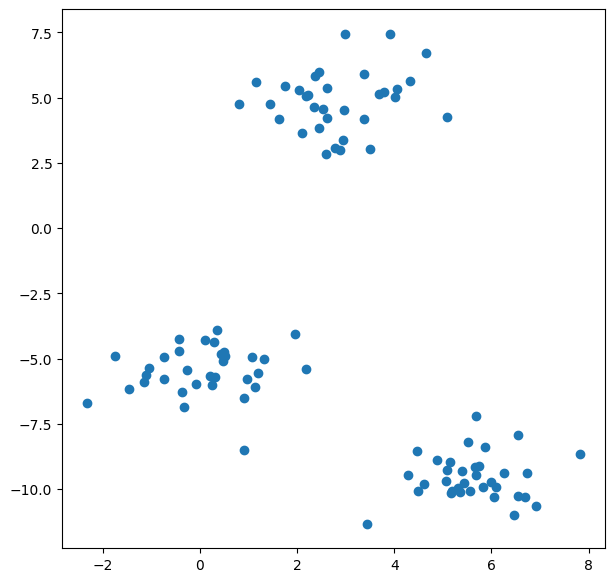

In [89]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1])

In [90]:
k = 3

In [91]:
np.random.seed(0)
centroid_ids = np.random.choice(X.shape[0], k, replace=False)
centroid_ids

array([26, 86,  2])

In [92]:
centroids = X[centroid_ids]
centroids

array([[ 2.52859794,  4.5759393 ],
       [-1.45074027, -6.18301386],
       [ 2.44301805,  3.84652646]])

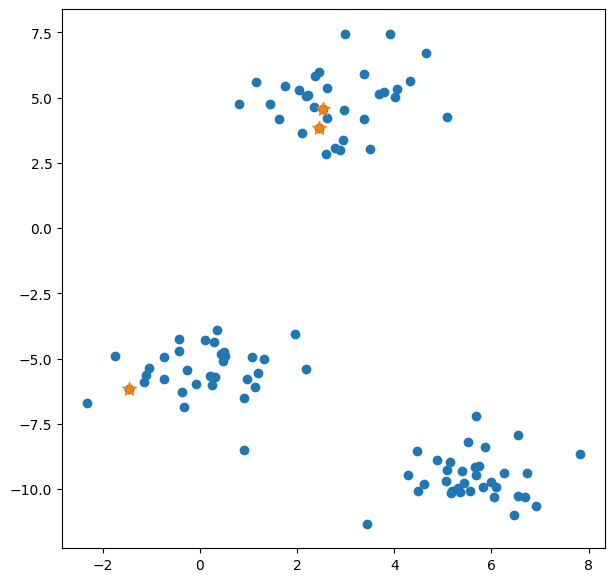

In [93]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=100);

In [94]:
colors = ['green', 'orange', 'red']

In [95]:
def KMeans(X, k=3, num_iter=10, min_distance=1e-4, seed=0):
    np.random.seed(seed)
    centroid_ids = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[centroid_ids]

    for i in range(num_iter):
        clusters = {i: [] for i in range(k)}

        for x in X:
            distances = np.linalg.norm(centroids - x, axis=1)
            cluster_ind = distances.argmin()
            clusters[cluster_ind].append(x)

        new_centroids = {}
        for cluster in clusters:
            new_centroids[cluster] = np.mean(clusters[cluster], axis=0)

        new_centroids = dict(sorted(new_centroids.items()))
        new_centroids = np.array(list(new_centroids.values()))

        is_stop = True
        for clust in range(len(centroids)):
            if np.linalg.norm(centroids[clust] - new_centroids[clust]) > min_distance:
                is_stop = False
                break
        if is_stop:
            print(f'stopping at iter {i}')
            break

        centroids = new_centroids.copy()

    return centroids, clusters

In [96]:
centroids, clusters = KMeans(X)
centroids

stopping at iter 2


array([[ 2.90614881,  5.43314686],
       [ 2.89504171, -7.53408753],
       [ 2.68953138,  3.53649614]])

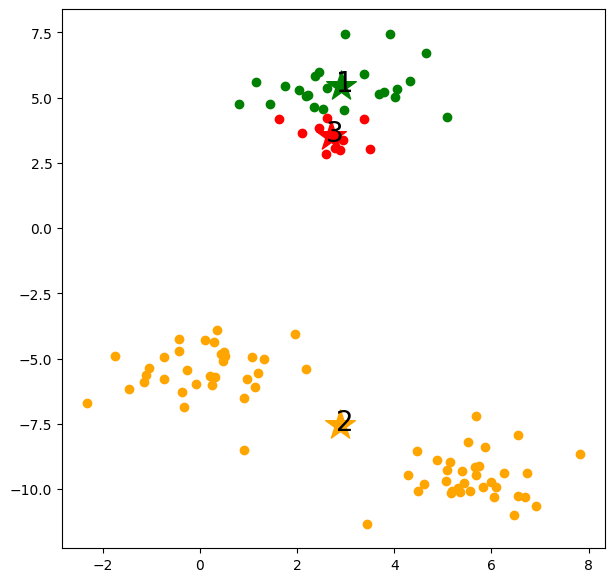

In [97]:
plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);

In [98]:
from sklearn.cluster import kmeans_plusplus

centroids_pp, centroids_ids = kmeans_plusplus(X, n_clusters=3, random_state=0)
centroids_pp, centroids_ids

(array([[-0.07790108, -5.98485443],
        [ 2.62413419,  5.36941887],
        [ 5.655043  , -9.1398234 ]]),
 array([54, 56, 66]))

In [99]:
X[centroids_ids]

array([[-0.07790108, -5.98485443],
       [ 2.62413419,  5.36941887],
       [ 5.655043  , -9.1398234 ]])

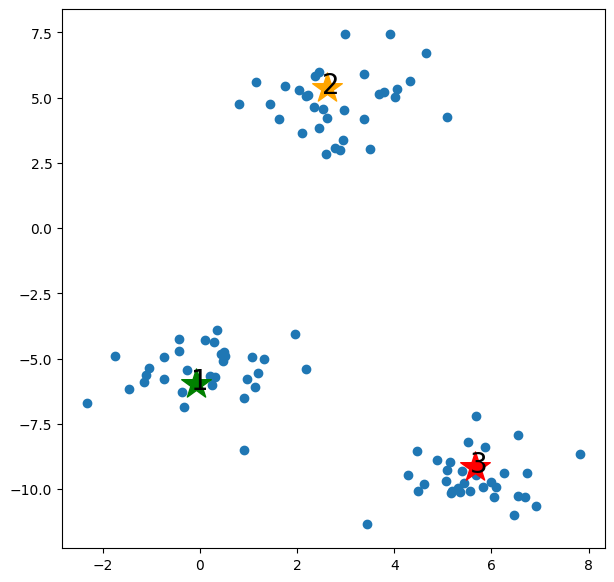

In [100]:
plt.figure(figsize=(7, 7))

plt.scatter(X[:, 0], X[:, 1])

for i, centr in enumerate(centroids_pp):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20)

In [101]:
def plot_data(X, centroids):
    plt.figure(figsize=(7, 7))

    plt.scatter(X[:, 0], X[:, 1])
    plt.scatter(centroids[:-1, 0], centroids[:-1, 1], marker='*', label='предыдущие центроиды')
    plt.scatter(centroids[-1, 0], centroids[-1, 1], marker='*', label='следующая центроида', s=200, edgecolors='black')

    plt.legend()
    plt.show()

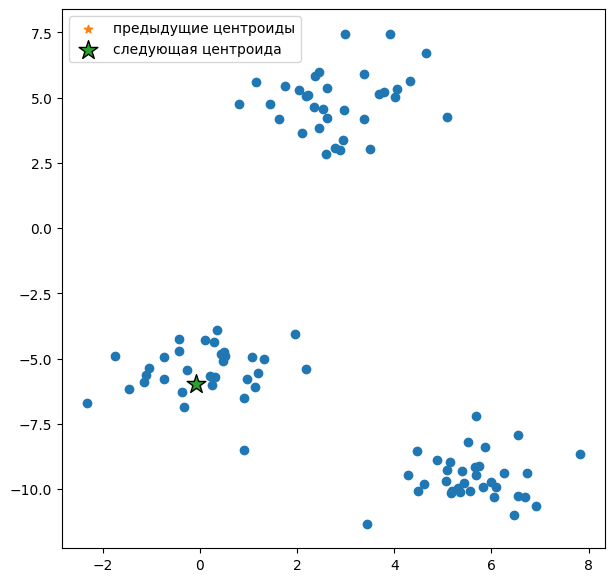

In [102]:
centroids = []
centroids.append(X[centroids_ids[0]])
plot_data(X, np.array(centroids))

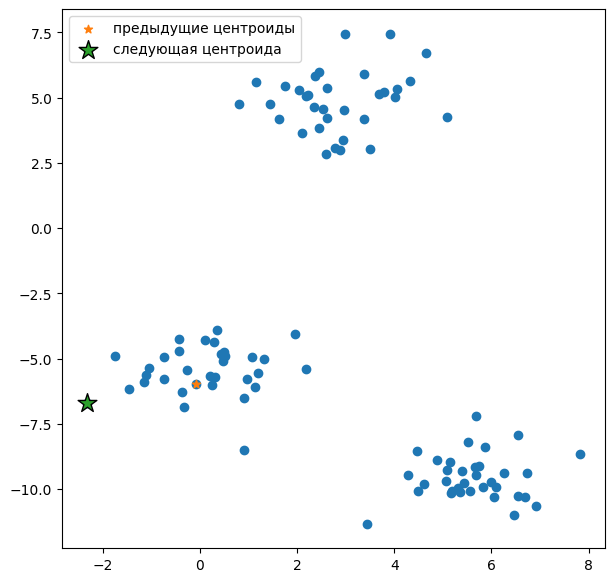

In [103]:
for x in X:
    distances = np.linalg.norm(centroids - x, axis=1)
    obj_ind = distances.argmax()

next_centroid = X[obj_ind]
centroids.append(next_centroid)

plot_data(X, np.array(centroids))

In [104]:
dists = []

for x in X:
    distances = np.linalg.norm(centroids - x, axis=1)
    dists.append(distances.min())

dists[:10]

[0.0,
 1.2372559272510562,
 10.149437590454564,
 7.097125522187684,
 11.470666237659321,
 10.74518893309026,
 7.495841986331263,
 1.7695110275044237,
 11.851214582159109,
 5.896939559038663]

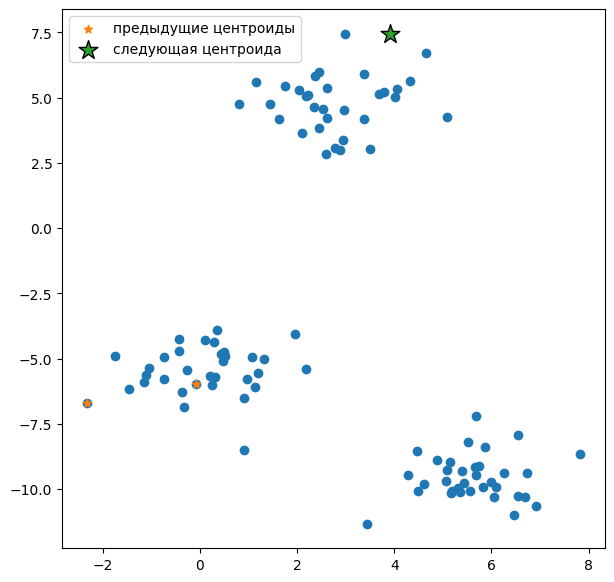

In [105]:
obj_ind = np.array(dists).argmax()
next_centroid = X[obj_ind]
centroids.append(next_centroid)

plot_data(X, np.array(centroids))

In [106]:
centroids

[array([-0.07790108, -5.98485443]),
 array([-2.32496308, -6.6999964 ]),
 array([3.90917002, 7.44140273])]

In [107]:
def kmeanspp(X, k=3, seed=0):
    centroids = []

    np.random.seed(seed)
    centroid_id = np.random.choice(X.shape[0])
    centroids.append(X[centroid_id])

    plot_data(X, np.array(centroids))


    for _ in range(k-1):
        dists = []
        for x in X:
            distances = np.linalg.norm(centroids - x, axis=1)
            dists.append(distances.min())

        obj_ind = np.array(dists).argmax()
        next_centroid = X[obj_ind]
        centroids.append(next_centroid)

        plot_data(X, np.array(centroids))

    return centroids

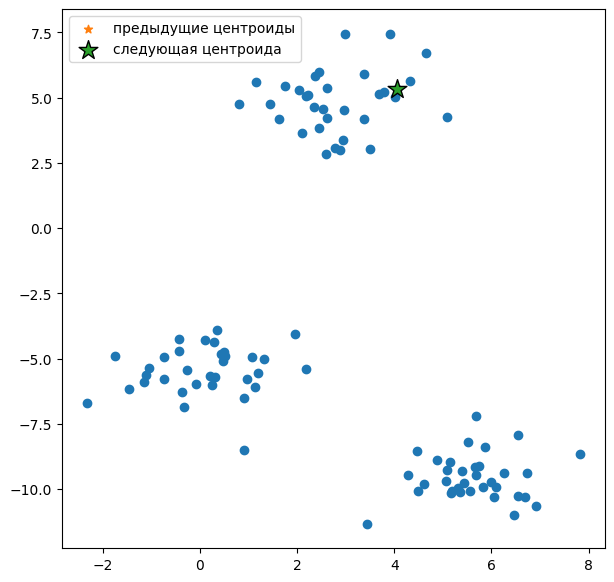

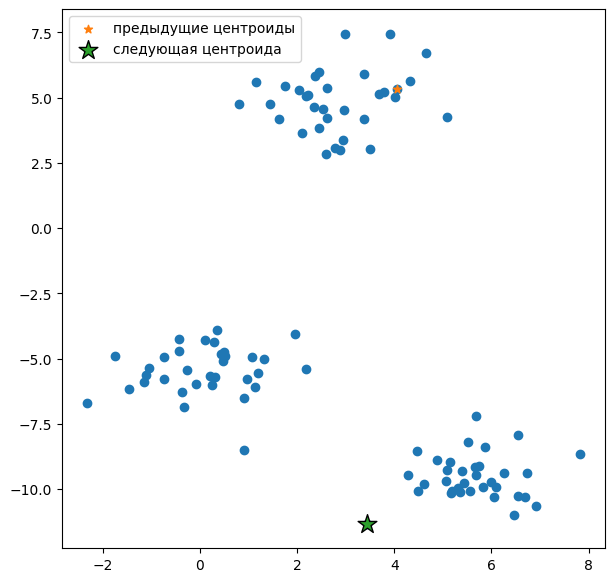

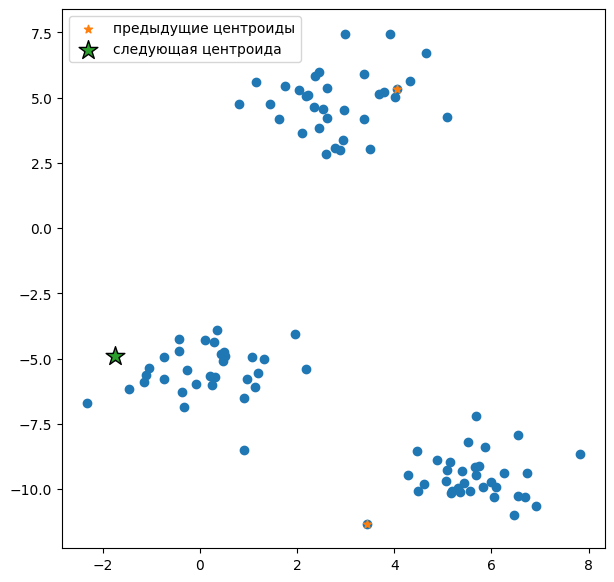

In [108]:
centroids = kmeanspp(X, k=3)

In [109]:
centroids

[array([4.05619693, 5.32231077]),
 array([  3.44868458, -11.32833331]),
 array([-1.74093095, -4.89176978])]

In [110]:
def KMeans(X, k=3, num_iter=10, min_distance=1e-4, seed=0, centroids=None):
    if centroids is None:
        np.random.seed(seed)
        centroid_ids = np.random.choice(X.shape[0], k, replace=False)
        centroids = X[centroid_ids]

    for i in range(num_iter):
        clusters = {i: [] for i in range(k)}

        for x in X:
            distances = np.linalg.norm(centroids - x, axis=1)
            cluster_ind = distances.argmin()
            clusters[cluster_ind].append(x)

        new_centroids = {}
        for cluster in clusters:
            new_centroids[cluster] = np.mean(clusters[cluster], axis=0)

        new_centroids = dict(sorted(new_centroids.items()))
        new_centroids = np.array(list(new_centroids.values()))

        is_stop = True
        for clust in range(len(centroids)):
            if np.linalg.norm(centroids[clust] - new_centroids[clust]) > min_distance:
                is_stop = False
                break
        if is_stop:
            print(f'stopping at iter {i}')
            break

        centroids = new_centroids.copy()

    return centroids, clusters

In [111]:
centroids, clusters = KMeans(X, centroids=centroids)

stopping at iter 2


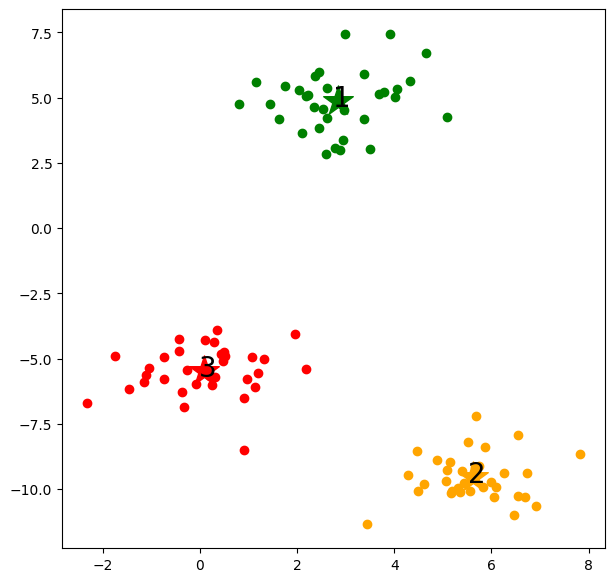

In [112]:
plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);

In [113]:
centroids = np.empty((k, X.shape[1]))
centroids[0] = X[centroids_ids[0]]
centroids

array([[-0.07790108, -5.98485443],
       [ 2.62413419,  5.36941887],
       [ 5.655043  ,  9.1398234 ]])

In [114]:
distances = []
for x in X:
    distances.append(np.linalg.norm(centroids[0] - x))

distances = np.array(distances) ** 2
distances[:10]

array([  5.56071569,   1.53080223, 103.0110834 ,  50.36919068,
       131.57618394, 115.45908521,  56.18764708,   3.13116928,
       140.45128707,  34.77389616])

In [115]:
sum_dist = distances.sum()
sum_dist

5890.938675981168

In [116]:
np.set_printoptions(suppress=True)

proba = distances / sum_dist
proba

array([0.00094394, 0.00025986, 0.01748636, 0.00855028, 0.02233535,
       0.01959944, 0.00953798, 0.00053152, 0.02384192, 0.00590295,
       0.00757838, 0.02303127, 0.01636815, 0.00030271, 0.00014076,
       0.02625325, 0.0052764 , 0.01594257, 0.00760046, 0.0189128 ,
       0.00560335, 0.00133287, 0.01658166, 0.00049034, 0.00615319,
       0.01970968, 0.0200858 , 0.02343685, 0.02469594, 0.00772065,
       0.00021789, 0.01997217, 0.02025271, 0.01094479, 0.00029231,
       0.00077596, 0.0001948 , 0.02533199, 0.01445686, 0.01514336,
       0.0006723 , 0.00695949, 0.00020239, 0.00001782, 0.02460436,
       0.00821462, 0.0086374 , 0.0046205 , 0.00023173, 0.01200923,
       0.03329879, 0.0009378 , 0.00695807, 0.00808796, 0.        ,
       0.01181324, 0.02312374, 0.000189  , 0.00910073, 0.00683959,
       0.03220622, 0.02224715, 0.00019763, 0.0004867 , 0.00025209,
       0.01060444, 0.00726887, 0.00031212, 0.00003017, 0.00046773,
       0.03121153, 0.00984711, 0.02012576, 0.02183011, 0.00003

In [117]:
proba.argmax()

50

In [118]:
proba[50]

0.03329878787854201

In [119]:
ind = np.random.choice(list(range(X.shape[0])), size=1, p=proba)
ind

array([56])

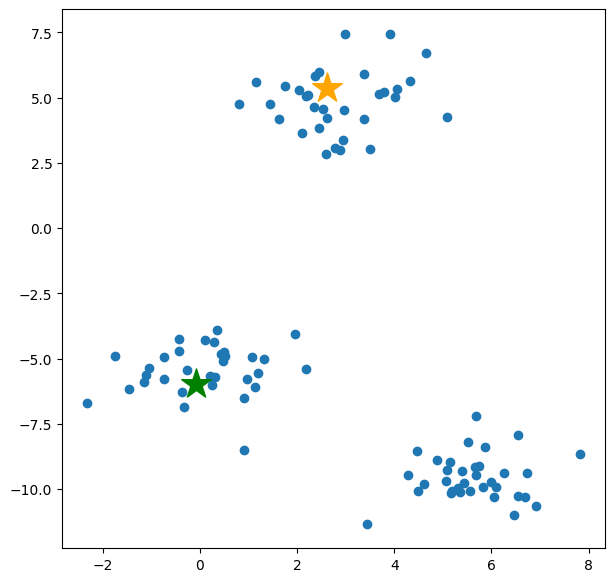

In [120]:
plt.figure(figsize=(7, 7))

plt.scatter(X[:, 0], X[:, 1])

plt.scatter(centroids[0, 0], centroids[0, 1], marker='*', s=500, c=colors[0])
plt.scatter(X[ind, 0], X[ind, 1], marker='*', s=500, c=colors[1]);

In [121]:
centroids[1] = X[ind]
centroids

array([[-0.07790108, -5.98485443],
       [ 2.62413419,  5.36941887],
       [ 5.655043  ,  9.1398234 ]])

In [122]:
distances = []
for x in X:
    distances.append(min(np.linalg.norm(centroids - x, axis=1)))

distances = np.array(distances) ** 2
distances[:10]

array([ 5.56071569,  1.53080223,  2.35200435, 50.36919068,  0.3557591 ,
        1.96486381, 56.18764708,  3.13116928,  1.35972249, 34.77389616])

In [123]:
sum_dist = distances.sum()
sum_dist

1740.0083684380882

In [124]:
proba = distances / sum_dist
proba

array([0.0031958 , 0.00087977, 0.00135172, 0.02894767, 0.00020446,
       0.00112923, 0.0322916 , 0.00179951, 0.00078145, 0.0199849 ,
       0.02565722, 0.00125388, 0.00238585, 0.00102485, 0.00047655,
       0.00171509, 0.01786366, 0.00360889, 0.02573196, 0.0007565 ,
       0.01897058, 0.00451252, 0.00184594, 0.00166009, 0.02083213,
       0.00209547, 0.00036709, 0.00068913, 0.00015402, 0.02613888,
       0.0007377 , 0.00101363, 0.0004963 , 0.03705448, 0.00098965,
       0.00262708, 0.00065951, 0.00021998, 0.00366446, 0.00331727,
       0.00227614, 0.02356193, 0.00068521, 0.00006034, 0.00117989,
       0.02781126, 0.02924261, 0.01564308, 0.00078453, 0.0406582 ,
       0.00340958, 0.00317499, 0.02355711, 0.02738243, 0.        ,
       0.03999468, 0.        , 0.00063987, 0.03081126, 0.023156  ,
       0.00254881, 0.00419595, 0.0006691 , 0.00164775, 0.00085347,
       0.03590218, 0.02460935, 0.00105671, 0.00010215, 0.00158354,
       0.00342716, 0.03333819, 0.00035666, 0.00012407, 0.00010

In [125]:
proba.argmax()

49

In [126]:
ind = np.random.choice(list(range(X.shape[0])), size=1, p=proba)
ind

array([90])

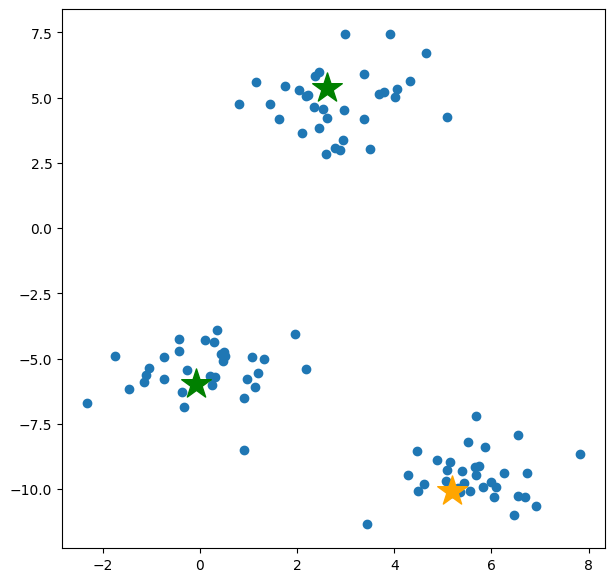

In [127]:
plt.figure(figsize=(7, 7))

plt.scatter(X[:, 0], X[:, 1])

plt.scatter(centroids[0, 0], centroids[0, 1], marker='*', s=500, c=colors[0])
plt.scatter(centroids[1, 0], centroids[1, 1], marker='*', s=500, c=colors[0])
plt.scatter(X[ind, 0], X[ind, 1], marker='*', s=500, c=colors[1]);

In [128]:
def kmeanspp(X, k=3, seed=0):
    centroids = []

    np.random.seed(seed)
    centroid_id = np.random.choice(X.shape[0])
    centroids.append(X[centroid_id])

    for _ in range(k-1):
        dists = []
        for x in X:
            distances = np.linalg.norm(centroids - x, axis=1)
            dists.append(distances.min())

        obj_ind = np.array(dists).argmax()
        next_centroid = X[obj_ind]
        centroids.append(next_centroid)

    return centroids

In [129]:
def KMeans(X, k=3, num_iter=10, min_distance=1e-4, seed=0, centroids=None):
    if centroids is None:
        centroids = kmeanspp(X, k=k, seed=seed)

    for i in range(num_iter):
        clusters = {i: [] for i in range(k)}

        for x in X:
            distances = np.linalg.norm(centroids - x, axis=1)
            cluster_ind = distances.argmin()
            clusters[cluster_ind].append(x)

        new_centroids = {}
        for cluster in clusters:
            new_centroids[cluster] = np.mean(clusters[cluster], axis=0)

        new_centroids = dict(sorted(new_centroids.items()))
        new_centroids = np.array(list(new_centroids.values()))

        is_stop = True
        for clust in range(len(centroids)):
            if np.linalg.norm(centroids[clust] - new_centroids[clust]) > min_distance:
                is_stop = False
                break
        if is_stop:
            print(f'stopping at iter {i}')
            break

        centroids = new_centroids.copy()

    return centroids, clusters

In [130]:
X, y = make_blobs(n_samples=300, random_state=13, cluster_std=1.5)

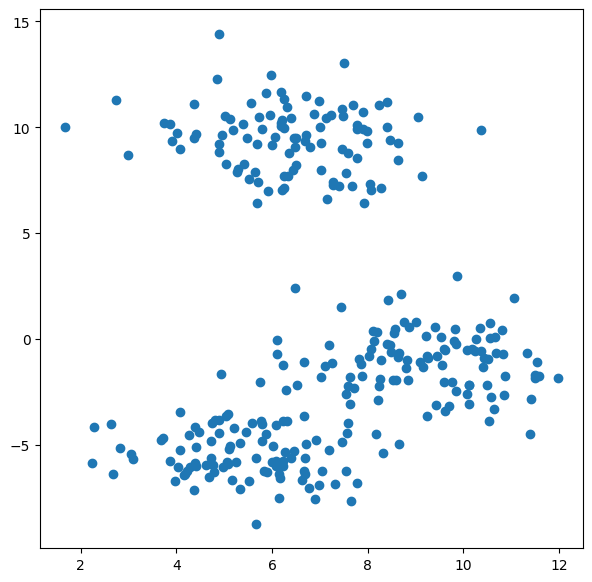

In [131]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1]);

In [132]:
centroids, clusters = KMeans(X)

stopping at iter 3


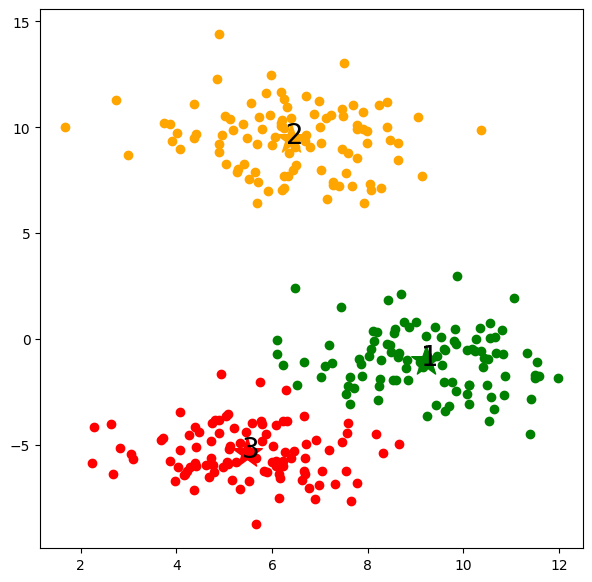

In [133]:
plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);

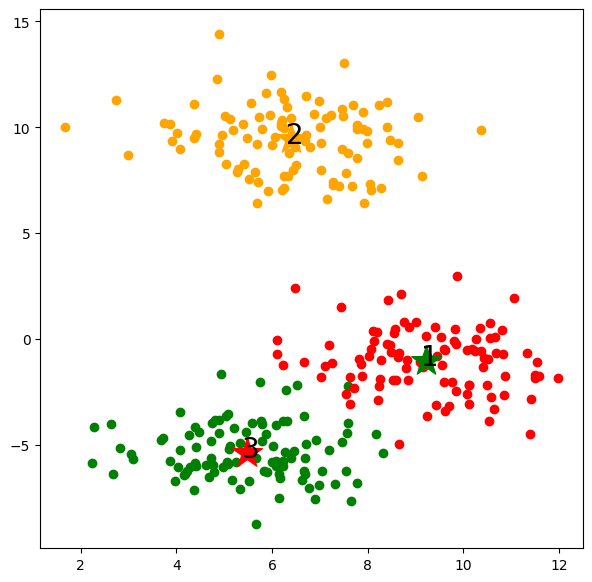

In [134]:
plt.figure(figsize=(7, 7))

for i in range(k):
    temp = X[y == i]
    plt.scatter(temp[:,0], temp[:,1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);

In [135]:
import matplotlib.pyplot as plt
import numpy as np

In [136]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, random_state=16)

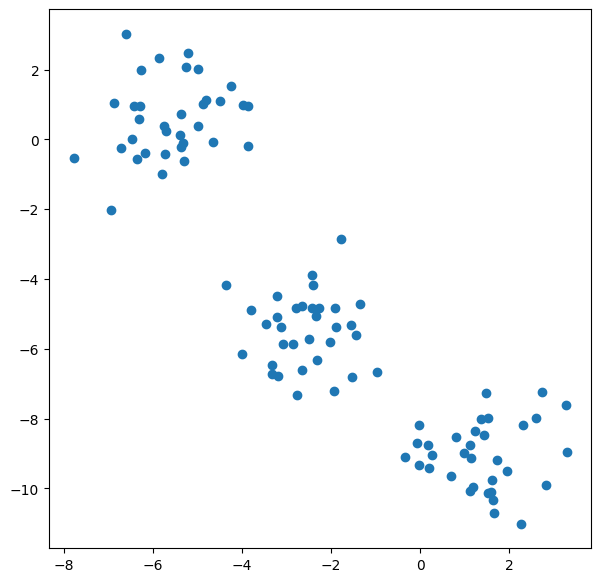

In [137]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1]);

In [138]:
centroid = np.mean(X, axis=0)
centroid

array([-2.29768256, -4.59342859])

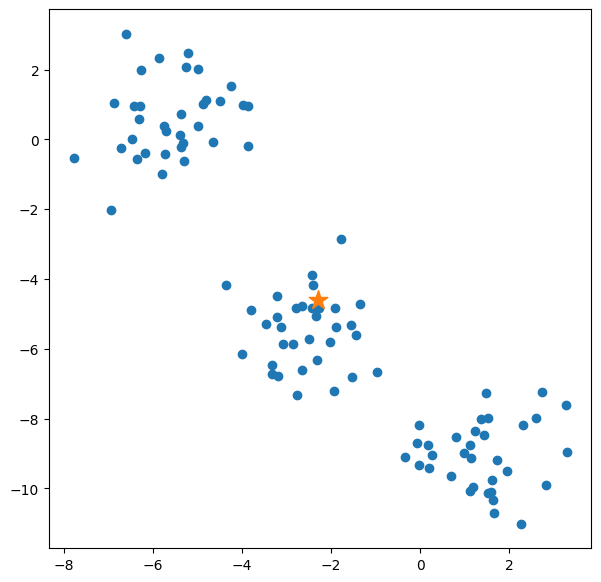

In [139]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(centroid[0], centroid[1], marker='*', s=200);

In [140]:
dists = 0
for x in X:
    dists += np.linalg.norm(x - centroid) ** 2

dists

2588.7486419573993

In [141]:
from sklearn.cluster import KMeans as sk_KMeans

km = sk_KMeans(n_clusters=1).fit(X)
km.inertia_

C:\Users\Prokhor\Desktop\Projects\Data_mining\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2588.748641957398

In [142]:
def kmeanspp(X, k=3, seed=0):
    centroids = []

    np.random.seed(seed)
    centroid_id = np.random.choice(X.shape[0])
    centroids.append(X[centroid_id])

    for _ in range(k-1):
        dists = []
        for x in X:
            distances = np.linalg.norm(centroids - x, axis=1)
            dists.append(distances.min())

        obj_ind = np.array(dists).argmax()
        next_centroid = X[obj_ind]
        centroids.append(next_centroid)

    return centroids

In [143]:
def KMeans(X, k=3, num_iter=10, min_distance=1e-4, seed=0, centroids=None):
    if centroids is None:
        centroids = kmeanspp(X, k=k, seed=seed)

    for i in range(num_iter):
        clusters = {i: [] for i in range(k)}

        for x in X:
            distances = np.linalg.norm(centroids - x, axis=1)
            cluster_ind = distances.argmin()
            clusters[cluster_ind].append(x)

        new_centroids = {}
        for cluster in clusters:
            new_centroids[cluster] = np.mean(clusters[cluster], axis=0)

        new_centroids = dict(sorted(new_centroids.items()))
        new_centroids = np.array(list(new_centroids.values()))

        is_stop = True
        for clust in range(len(centroids)):
            if np.linalg.norm(centroids[clust] - new_centroids[clust]) > min_distance:
                is_stop = False
                break
        if is_stop:
            print(f'stopping at iter {i}')
            break

        centroids = new_centroids.copy()

    return centroids, clusters

In [144]:
centroids, clusters = KMeans(X, k=2)

stopping at iter 1


In [145]:
colors = ['green', 'orange', 'red', 'navy', 'pink', 'yellow', 'black']

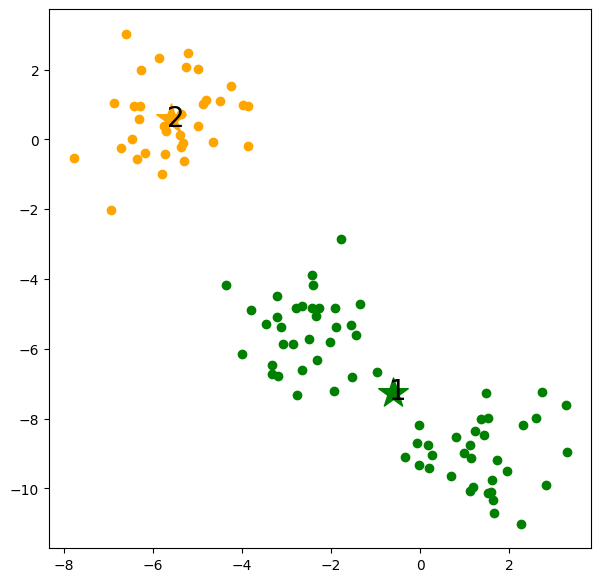

In [146]:
plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);

In [147]:
dists = 0
for i in clusters:
    for x in clusters[i]:
        dists += np.linalg.norm(x - centroids[i]) ** 2

dists

649.4333696428022

In [148]:
km = sk_KMeans(n_clusters=2).fit(X)
km.inertia_

C:\Users\Prokhor\Desktop\Projects\Data_mining\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


648.9673346244895

In [149]:
centroids, clusters = KMeans(X, k=3)

stopping at iter 2


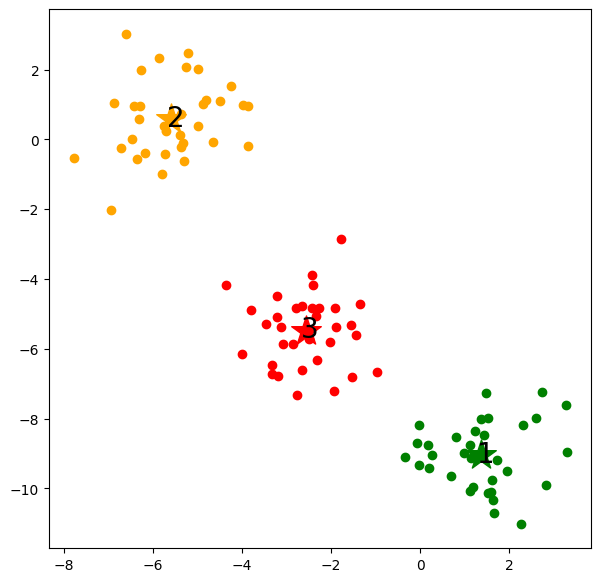

In [150]:
plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);

In [151]:
dists = 0
for i in clusters:
    for x in clusters[i]:
        dists += np.linalg.norm(x - centroids[i]) ** 2

dists

182.88763537399484

In [152]:
km = sk_KMeans(n_clusters=3).fit(X)
km.inertia_

C:\Users\Prokhor\Desktop\Projects\Data_mining\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


182.88763537399487

In [153]:
inertias = []
for i in range(1, 7):
    centroids, clusters = KMeans(X, k=i)
    dists = 0
    for i in clusters:
        for x in clusters[i]:
            dists += np.linalg.norm(x - centroids[i]) ** 2

    inertias.append(dists)

stopping at iter 1
stopping at iter 1
stopping at iter 2
stopping at iter 8
stopping at iter 2
stopping at iter 2


In [154]:
inertias

[2588.7486419573993,
 649.4333696428022,
 182.88763537399484,
 154.3118712536231,
 140.48669823056807,
 117.49339708989534]

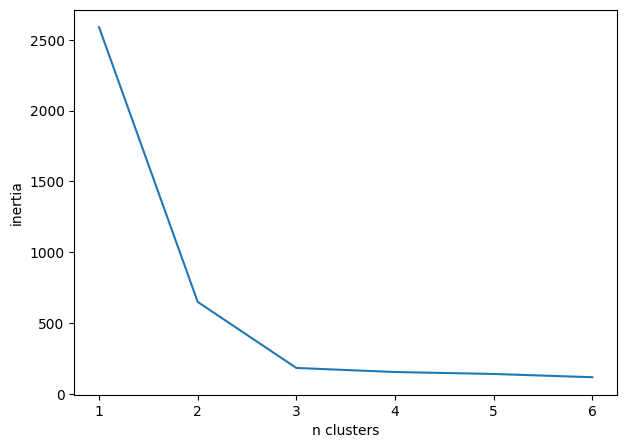

In [155]:
plt.figure(figsize=(7, 5))
plt.plot(inertias)
plt.xticks(np.arange(0, 6), np.arange(1, 7))
plt.xlabel('n clusters')
plt.ylabel('inertia');

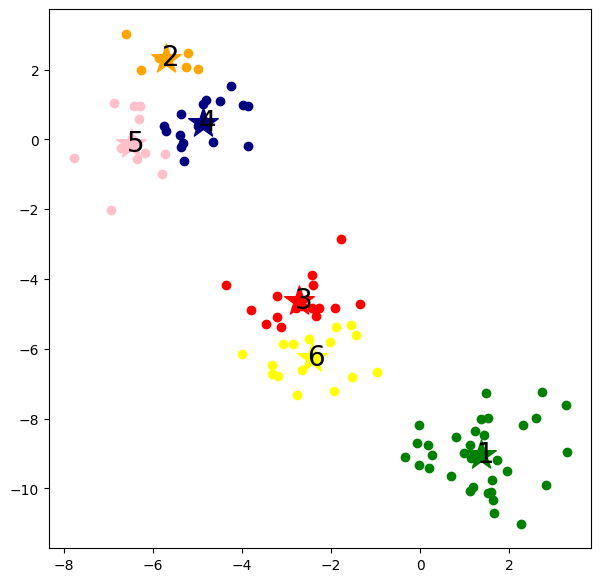

In [156]:
plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);

In [157]:
diff = np.diff(inertias)

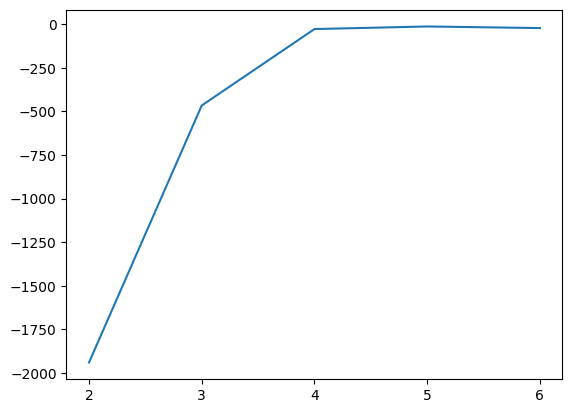

In [158]:
plt.plot(diff)
plt.xticks(np.arange(0, 5), np.arange(2, 7));

In [159]:
diff[1:]

array([-466.54573427,  -28.57576412,  -13.82517302,  -22.99330114])

In [160]:
diff[:-1]

array([-1939.31527231,  -466.54573427,   -28.57576412,   -13.82517302])

In [161]:
diff_r = diff[1:] / diff[:-1]

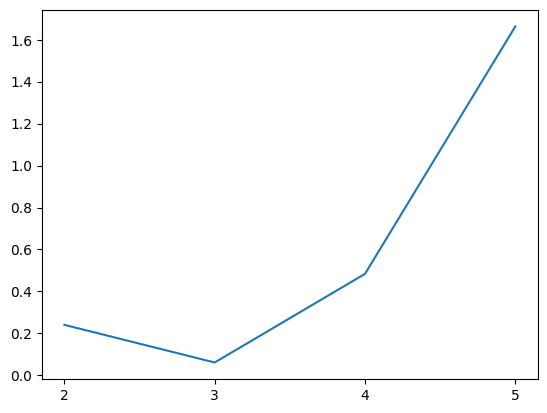

In [162]:
plt.plot(diff_r)
plt.xticks(np.arange(0, 4), np.arange(2, 6));

In [163]:
centroids, clusters = KMeans(X, k=3)

stopping at iter 2


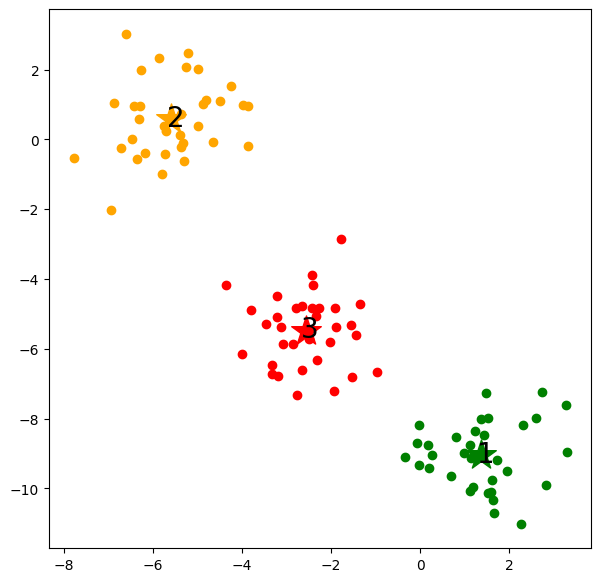

In [164]:
plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);

In [165]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=300, random_state=10, n_informative=2, n_redundant=0)

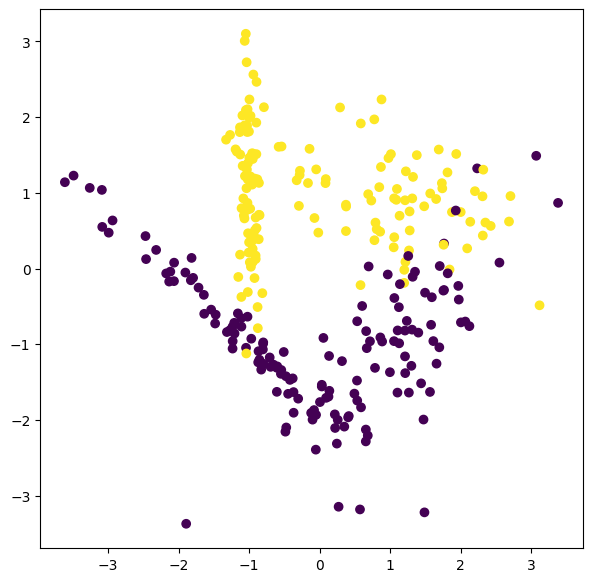

In [166]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y);

In [167]:
inertias = []
for i in range(1, 7):
    centroids, clusters = KMeans(X, k=i)
    dists = 0
    for i in clusters:
        for x in clusters[i]:
            dists += np.linalg.norm(x - centroids[i]) ** 2

    inertias.append(dists)

stopping at iter 1


In [168]:
inertias

[6281.391177646002,
 5925.287079888724,
 5542.179623547259,
 5386.471555837043,
 5285.379165902779,
 5179.179598195613]

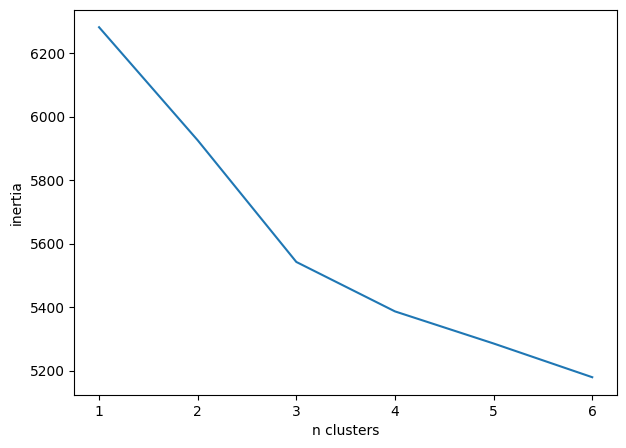

In [169]:
plt.figure(figsize=(7, 5))
plt.plot(inertias)
plt.xlabel('n clusters')
plt.ylabel('inertia')
plt.xticks(np.arange(0, 6), np.arange(1, 7));

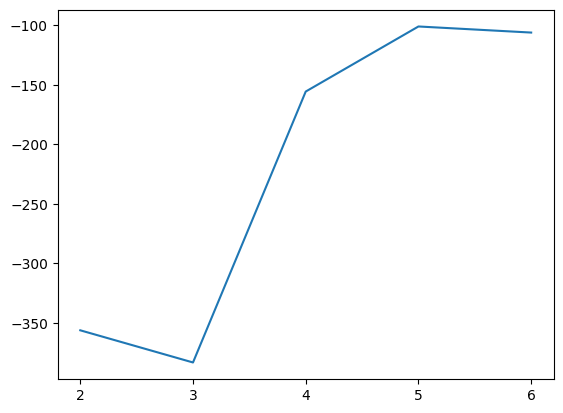

In [170]:
diff = np.diff(inertias)

plt.plot(diff)
plt.xticks(np.arange(0, 5), np.arange(2, 7));

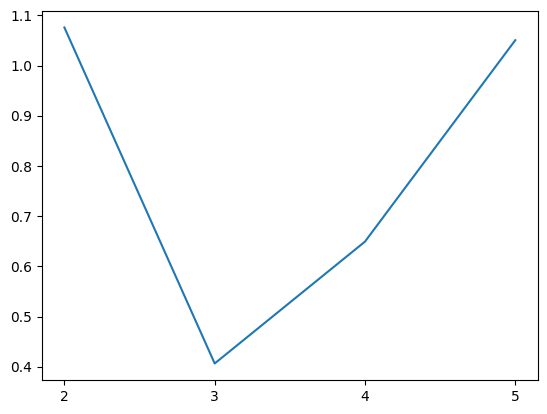

In [171]:
diff_r = diff[1:] / diff[:-1]

plt.plot(diff_r)
plt.xticks(np.arange(0, 4), np.arange(2, 6));

In [172]:
centroids, clusters = KMeans(X, k=3, num_iter=20, seed=10)

stopping at iter 15


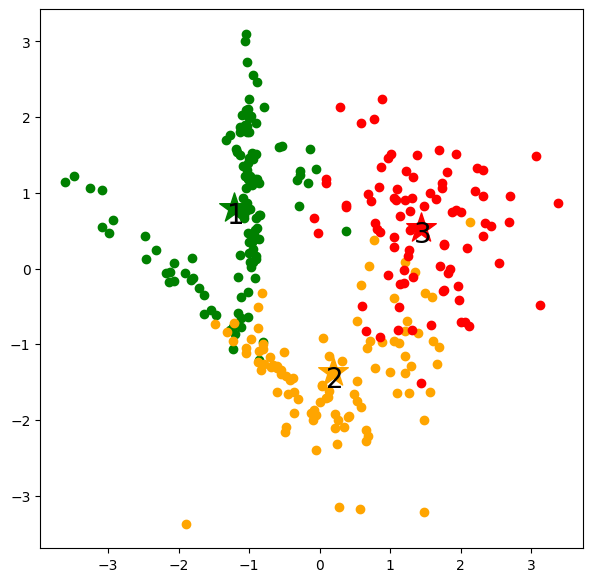

In [173]:
plt.figure(figsize=(7, 7))

for i in clusters:
    for x in clusters[i]:
        plt.scatter(x[0], x[1], color=colors[i])

for i, centr in enumerate(centroids):
    plt.scatter(centr[0], centr[1], marker='*', s=500, c=colors[i])
    plt.text(centr[0]-0.1, centr[1]-0.2, f'{i+1}', fontsize=20);